In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, classification_report

# source .venv/bin/active
#deactivate 

In [2]:
#read the data file and load the data
df = pd.read_csv('Final_project_telcom_churn_dataset.csv')
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
15992,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
15993,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
15994,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
#find the standard deviation for Total day minutes
t_dayminutes = np.std(df["Total day minutes"])
print("Standard Deviation:", t_dayminutes)
var_dayminutes = np.var(df["Total day minutes"])
print("Variance:", var_dayminutes)

Standard Deviation: 54.20018228488602
Variance: 2937.6597597148725


In [5]:
#find the standard deviation for Total day charge
t_daycharge = np.std(df["Total day charge"])
print("Standard Deviation:", t_daycharge)
var_daycharge = np.var(df["Total day charge"])
print("Variance:", var_daycharge)

Standard Deviation: 9.214004363041164
Variance: 84.8978764021416


In [6]:
#find the standard deviation for Total eve minutes
t_eveminutes = np.std(df["Total eve minutes"])
print("Standard Deviation:", t_eveminutes)
var_eveminutes = np.var(df["Total eve minutes"])
print("Variance:", var_eveminutes)

Standard Deviation: 50.94195842336368
Variance: 2595.083128007714


In [7]:
#find the standard deviation for Total eve charge
t_evecharge = np.std(df["Total eve charge"])
print("Standard Deviation:", t_evecharge)
var_evecharge = np.var(df["Total eve charge"])
print("Variance:", var_evecharge)

Standard Deviation: 4.330051860525854
Variance: 18.749349114843415


In [8]:
#find the standard deviation for Total night minutes
t_nightminutes = np.std(df["Total night minutes"])
print("Standard Deviation:", t_nightminutes)
var_nightminutes = np.var(df["Total night minutes"])
print("Variance:", var_nightminutes)

Standard Deviation: 50.7707987839339
Variance: 2577.6740091587035


In [9]:
#find the standard deviation for Total night charge
t_nightcharge = np.std(df["Total night charge"])
print("Standard Deviation:", t_nightcharge)
var_nightcharge = np.var(df["Total night charge"])
print("Variance:", var_nightcharge)

Standard Deviation: 2.284690905669573
Variance: 5.219812534449254


In [10]:
#find the standard deviation for Total intl minutes
t_intlminutes = np.std(df["Total intl minutes"])
print("Standard Deviation:", t_intlminutes)
var_intlminutes = np.var(df["Total intl minutes"])
print("Variance:", var_intlminutes)

Standard Deviation: 2.7878255819088835
Variance: 7.771971475145605


In [11]:
#find the standard deviation for Total intl minutes
t_intlcharge = np.std(df["Total intl charge"])
print("Standard Deviation:", t_intlcharge)
var_intlcharge = np.var(df["Total intl charge"])
print("Variance:", var_intlcharge)

Standard Deviation: 0.7526708523238715
Variance: 0.5665134119379432


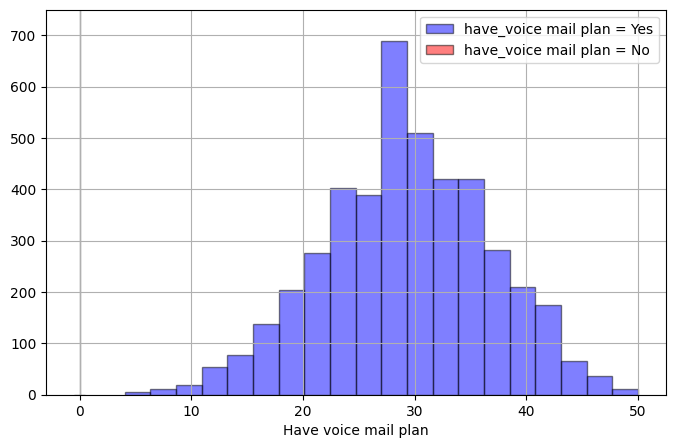

In [12]:
#histogram of have voice mail plan & number voice mail messages
fig = plt.figure(figsize = (8,5))
df[df['Voice mail plan'] == 'Yes']['Number vmail messages'].hist(alpha = 0.5, color='blue', bins= 20, 
                                                                   label='have_voice mail plan = Yes', edgecolor = "black")
df[df['Voice mail plan'] == 'No']['Number vmail messages'].hist(alpha = 0.5, color ='red', bins=20, 
                                                                  label='have_voice mail plan = No', edgecolor = "black")
plt.ylim(0,750)
plt.legend()
plt.xlabel('Have voice mail plan')
plt.show()
#This distribution is a normal distribution, tells us that 95% of the voice mail plan owners have 100 to 400 voice mail messages.

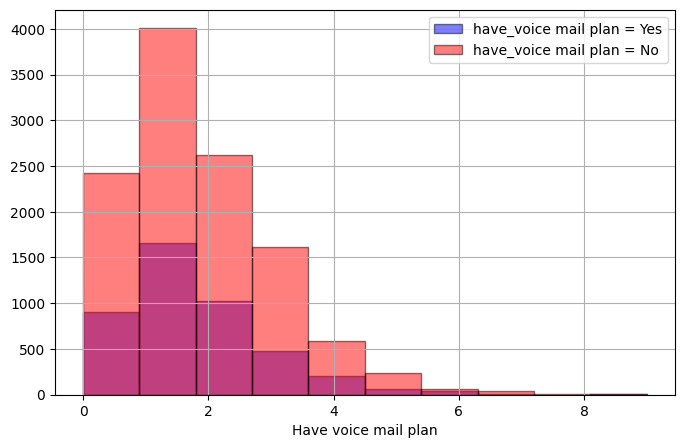

In [13]:
#histogram of have voice mail plan & number of customers service calls
fig = plt.figure(figsize = (8,5))
df[df['Voice mail plan'] == 'Yes']['Customer service calls'].hist(alpha =0.5, color='blue', bins= 10, 
                                                                   label='have_voice mail plan = Yes', edgecolor = "black")
df[df['Voice mail plan'] == 'No']['Customer service calls'].hist(alpha = 0.5, color ='red', bins=10, 
                                                                  label='have_voice mail plan = No', edgecolor = "black")
plt.legend()
plt.xlabel('Have voice mail plan')
plt.show()
#This distribution is a right skew distribution, tells us that the majority of people don't call the customer service calls regardless of their voice mail plan status.

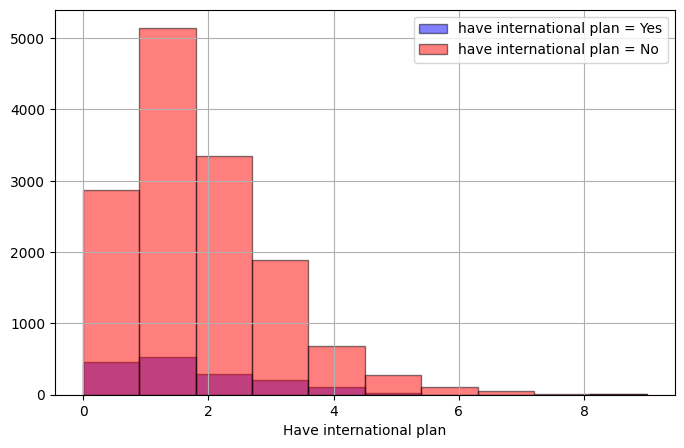

In [14]:
#histogram of have international plan & number customers service calls
fig = plt.figure(figsize = (8,5))
df[df['International plan'] == 'Yes']['Customer service calls'].hist(alpha =0.5, color='blue', bins= 10, 
                                                                   label='have international plan = Yes', edgecolor = "black")
df[df['International plan'] == 'No']['Customer service calls'].hist(alpha = 0.5, color ='red', bins=10, 
                                                                  label='have international plan = No', edgecolor = "black")
plt.legend()
plt.xlabel('Have international plan')
plt.show()
#This distribution is a right skew distribution, tells us that the majority of people don't call the customer service calls regardless of their international plan status.

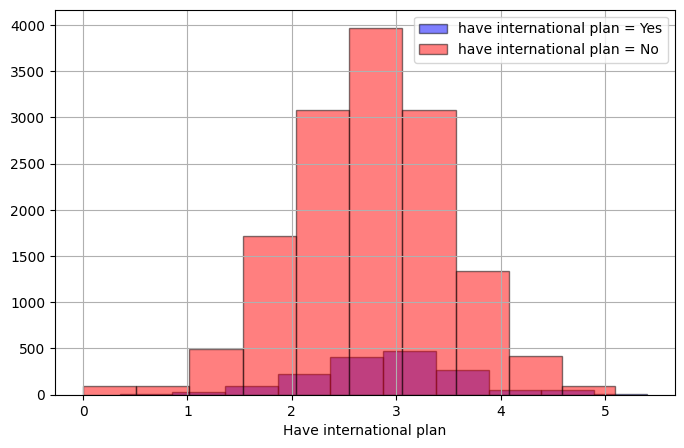

In [15]:
#histogram of have voice mail plan & number voice mail messages
fig = plt.figure(figsize = (8,5))
df[df['International plan'] == 'Yes']['Total intl charge'].hist(alpha =0.5, color='blue', bins= 10, 
                                                                   label='have international plan = Yes', edgecolor = "black")
df[df['International plan'] == 'No']['Total intl charge'].hist(alpha = 0.5, color ='red', bins=10, 
                                                                  label='have international plan = No', edgecolor = "black")
plt.legend()
plt.xlabel('Have international plan')
plt.show()
#This distribution is a normal distribution, tells us that the majority of people have international charge fees regardless of their international plan status.

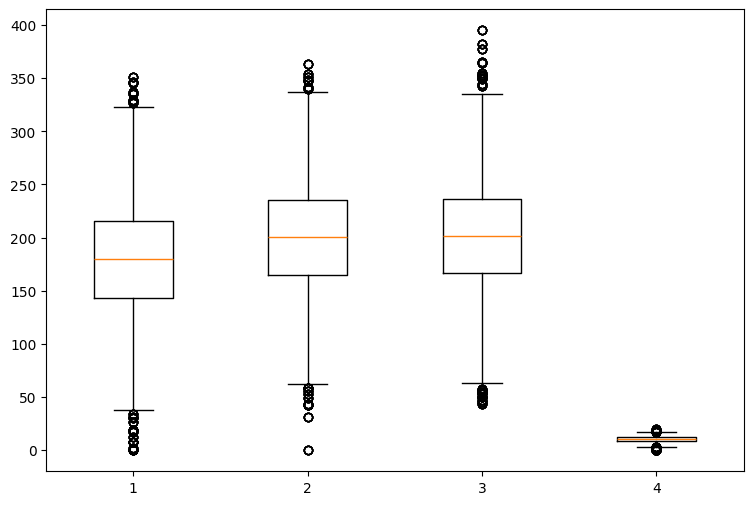

In [16]:
#boxplot for minutes
to_plot=[df["Total day minutes"], df["Total eve minutes"],df["Total night minutes"], df["Total intl minutes"]]
fig=plt.figure(1, figsize=(9,6))
ax=fig.add_subplot()
bp=ax.boxplot(to_plot)

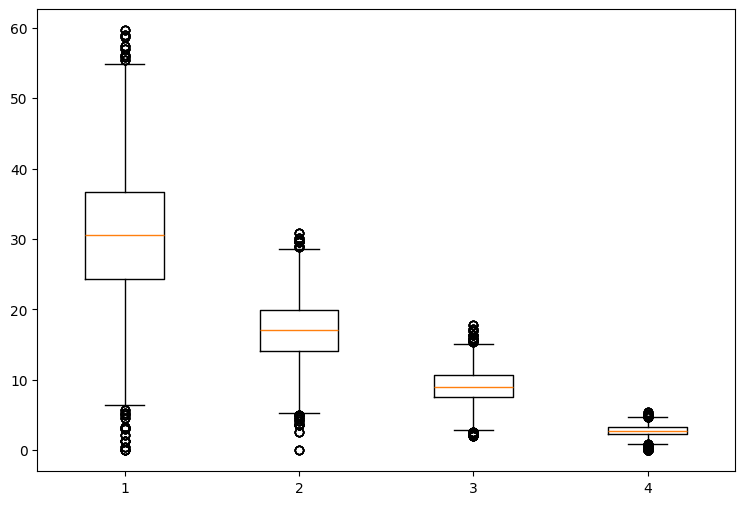

In [17]:
#boxplot for charge
to_plot2=[df["Total day charge"], df["Total eve charge"],df["Total night charge"], df["Total intl charge"]]
fig=plt.figure(1, figsize=(9,6))
ax2=fig.add_subplot()
bp2=ax2.boxplot(to_plot2)

(0.0, 55.0)

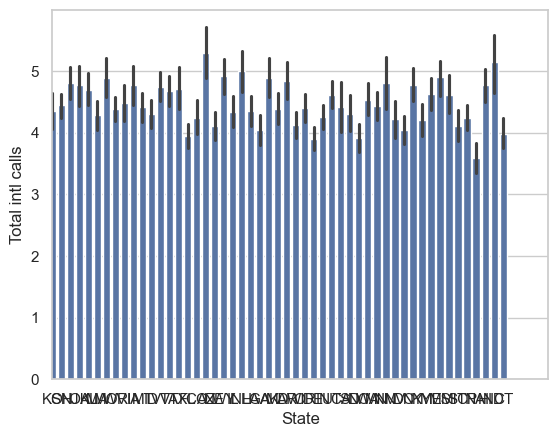

In [18]:
#barchart for calls
sns.set_theme(style="whitegrid")
ax= sns.barplot(x="State",y="Total intl calls", data = df)
plt.xlim(0,55)

<Axes: xlabel='Churn', ylabel='count'>

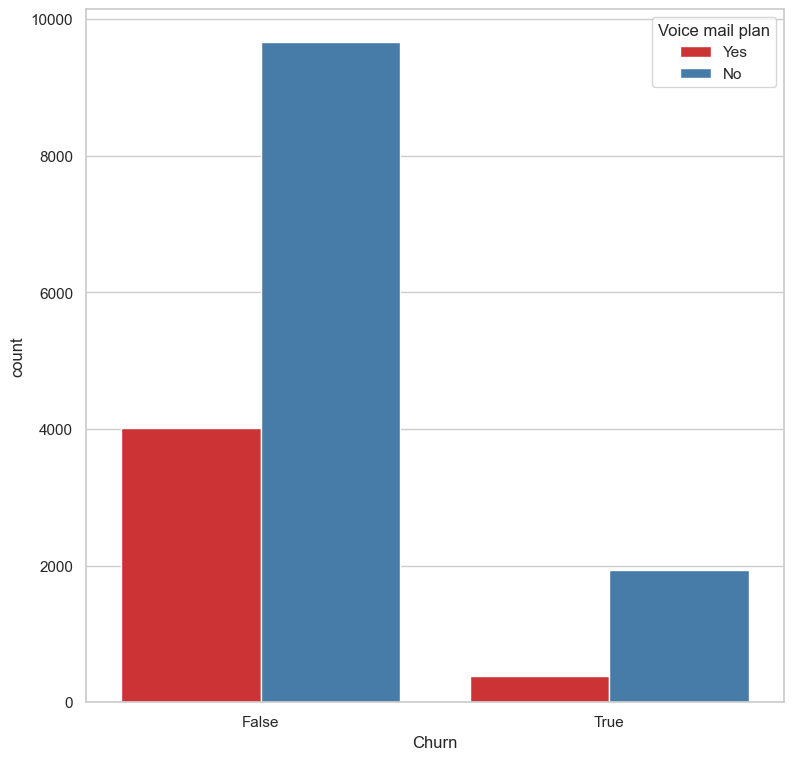

In [19]:
#counting number of people who have voice mail plan chose to cancel the service
plt.figure(figsize=(9,9))
sns.countplot(x='Churn', hue='Voice mail plan', data=df, palette='Set1')

Text(0, 0.5, 'number of people whether they cancel service')

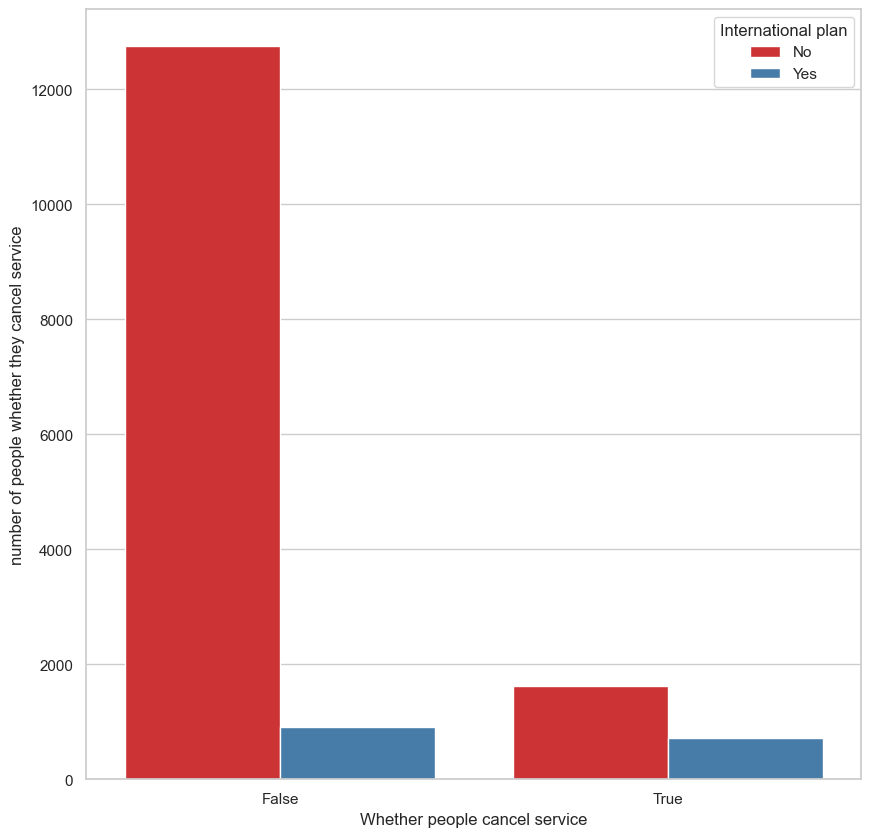

In [20]:
#counting number of people who have international plan chose to cancel the service
plt.figure(figsize=(10,10))
sns.countplot(x='Churn', hue='International plan', data=df, palette='Set1')
plt.xlabel('Whether people cancel service') 
plt.ylabel('number of people whether they cancel service')

In [21]:
# Module 3 + Module 7 | Using Log transformation to reduce large values and in turn reducing the skewness of the data:
log_columns = ["Number vmail messages", "Total day minutes", 
           "Total day calls", "Total day charge", "Total eve minutes", 
           "Total eve calls", "Total eve charge", "Total night minutes",
           "Total night calls", "Total night charge", "Total intl minutes",
           "Total intl calls", "Customer service calls"]
df[log_columns] = np.log1p(df[log_columns])

# Display the first few rows of the transformed data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,3.258097,5.583872,4.709530,3.830162,5.290285,4.605170,2.878074,5.504111,4.521789,2.485740,2.397895,1.386294,2.70,0.693147,False
1,OH,107,415,No,Yes,3.295837,5.091293,4.820282,3.348851,5.280662,4.644391,2.869035,5.542831,4.644391,2.521721,2.687847,1.386294,3.70,0.693147,False
2,NJ,137,415,No,No,0.000000,5.498806,4.744932,3.746677,4.805659,4.709530,2.424803,5.097424,4.653960,2.118662,2.580217,1.791759,3.29,0.000000,False
3,OH,84,408,Yes,No,0.000000,5.705115,4.276666,3.949319,4.141546,4.488636,1.834180,5.287762,4.499810,2.288486,2.028148,2.079442,1.78,1.098612,False
4,OK,75,415,Yes,No,0.000000,5.122177,4.736198,3.378952,5.005958,4.812184,2.610805,5.235910,4.804021,2.241773,2.406945,1.386294,2.73,1.386294,False


In [22]:
# Module 3 + Module 7 | Handling Missing Data:
imputer = KNNImputer(n_neighbors=5)
columns = ["Account length", "Number vmail messages", "Total day minutes", 
           "Total day calls", "Total day charge", "Total eve minutes", 
           "Total eve calls", "Total eve charge", "Total night minutes",
           "Total night calls", "Total night charge", "Total intl minutes",
           "Total intl calls", "Customer service calls"]

df[columns] = imputer.fit_transform(df[columns])

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128.0,415,No,Yes,3.258097,5.583872,4.709530,3.830162,5.290285,4.605170,2.878074,5.504111,4.521789,2.485740,2.397895,1.386294,2.70,0.693147,False
1,OH,107.0,415,No,Yes,3.295837,5.091293,4.820282,3.348851,5.280662,4.644391,2.869035,5.542831,4.644391,2.521721,2.687847,1.386294,3.70,0.693147,False
2,NJ,137.0,415,No,No,0.000000,5.498806,4.744932,3.746677,4.805659,4.709530,2.424803,5.097424,4.653960,2.118662,2.580217,1.791759,3.29,0.000000,False
3,OH,84.0,408,Yes,No,0.000000,5.705115,4.276666,3.949319,4.141546,4.488636,1.834180,5.287762,4.499810,2.288486,2.028148,2.079442,1.78,1.098612,False
4,OK,75.0,415,Yes,No,0.000000,5.122177,4.736198,3.378952,5.005958,4.812184,2.610805,5.235910,4.804021,2.241773,2.406945,1.386294,2.73,1.386294,False


In [23]:
# Module 3 + Module 7 | Dummy Coding all categorical data:
dummies_df = pd.get_dummies(df, columns=["State", "Area code", "International plan" , "Voice mail plan"], drop_first=True)
dummies_df.head(3)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,128.0,3.258097,5.583872,4.709530,3.830162,5.290285,4.605170,2.878074,5.504111,4.521789,...,False,False,False,False,False,False,True,False,False,True
1,107.0,3.295837,5.091293,4.820282,3.348851,5.280662,4.644391,2.869035,5.542831,4.644391,...,False,False,False,False,False,False,True,False,False,True
2,137.0,0.000000,5.498806,4.744932,3.746677,4.805659,4.709530,2.424803,5.097424,4.653960,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Module 3 + Module 7 | Principal Component Analysis on the dataset:
numeric_df = df.select_dtypes(include=[np.number])

numeric_df = numeric_df.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=["Principal Component 1", "Principal Component 2"])

explained_variance = pca.explained_variance_ratio_
print('Explained variance by component: ',explained_variance)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()